In [85]:
# Actualizamos los módulos automáticamente
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sys
import os

# Añadir el directorio scripts al PYTHONPATH
sys.path.append(os.path.abspath("../scripts"))

import funciones

# Rutas
ruta_steam_games = '../data/steam_games.parquet'

# Carga de datos
steam_games_df = pd.read_parquet(ruta_steam_games)

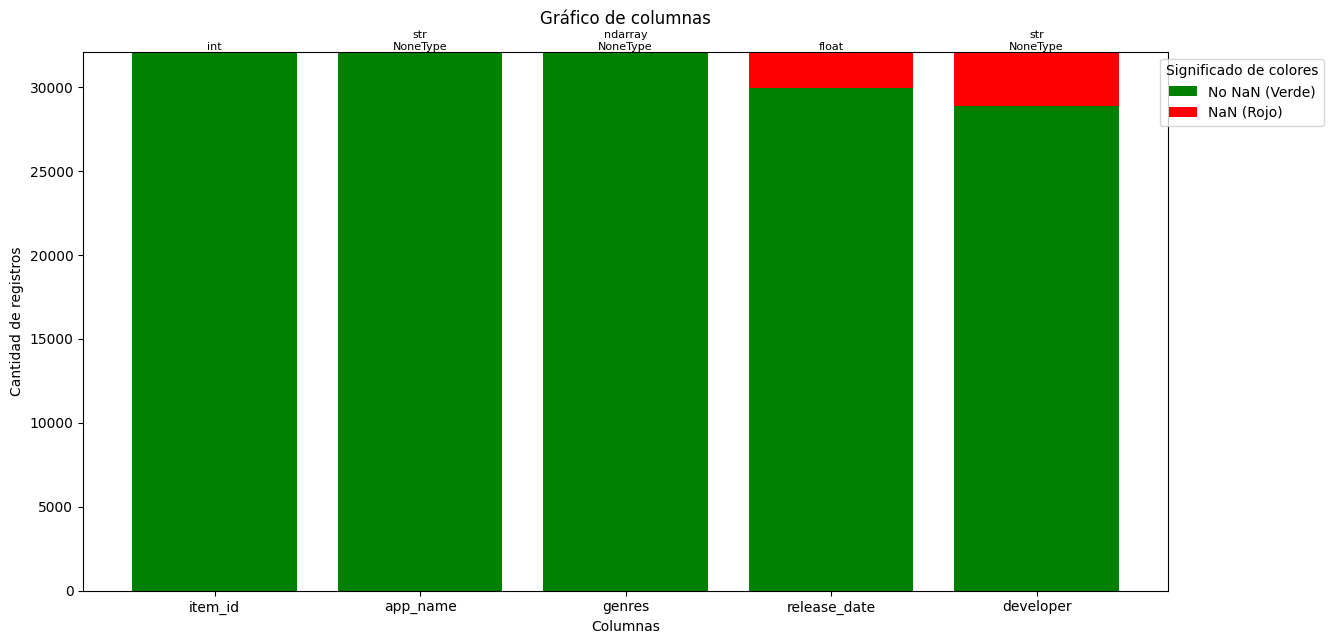

In [6]:
# Primer visualización
funciones.plot_df_info(steam_games_df)

In [8]:
steam_games_df.head()

,item_id,app_name,genres,release_date,developer
0,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]",2018.0,Kotoshiro
1,643980,Ironbound,"[2D, Board Game, Card Game, Character Customiz...",2018.0,Secret Level SRL
2,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Multiplayer, Sim...",2017.0,Poolians.com
3,767400,弹炸人2222,"[Action, Adventure, Casual]",2017.0,彼岸领域
4,773570,Log Challenge,"[Action, Casual, Indie, Sports]",NaN,None


In [9]:
steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32105 entries, 0 to 32104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       32105 non-null  int32  
 1   app_name      32104 non-null  object 
 2   genres        31994 non-null  object 
 3   release_date  29938 non-null  float64
 4   developer     28834 non-null  object 
dtypes: float64(1), int32(1), object(3)
memory usage: 1.1+ MB


In [10]:
steam_games_df.describe(include='all')

,item_id,app_name,genres,release_date,developer
count,3.210500e+04,32104,31994,29938.000000,28834
unique,NaN,32068,27924,NaN,10992
top,NaN,Soundtrack,[Action],NaN,Ubisoft - San Francisco
freq,NaN,3,1106,NaN,1259
mean,4.518384e+05,NaN,NaN,2014.770125,NaN
std,1.827305e+05,NaN,NaN,3.505444,NaN
min,1.000000e+01,NaN,NaN,1970.000000,NaN
25%,3.293700e+05,NaN,NaN,2014.000000,NaN
50%,4.521500e+05,NaN,NaN,2016.000000,NaN
75%,5.934600e+05,NaN,NaN,2017.000000,NaN


# Manejo de nulos

In [86]:
# steam_games.genres
null_genres_df = steam_games_df[steam_games_df['genres'].isna()]
print(null_genres_df.shape)
print(steam_games_df.shape)

(111, 5)
(32105, 5)


In [87]:
# A fin de no perder datos y de explorar mas adelante la recuperación de los mismos vamos a etiquetar los nulos como "desconocidos"

# Imputar "Desconocido" en la columna 'genres'
steam_games_df['genres'] = steam_games_df['genres'].apply(lambda x: np.array(['Desconocido']) if x is None else x)

In [88]:
# steam_games.release_date
null_release_date_df = steam_games_df.loc[steam_games_df['release_date'].isna()]
print(null_release_date_df.shape)
print(steam_games_df.shape)
print(f'porcentaje de nulos: {round((null_release_date_df.shape[0] * 100) / steam_games_df.shape[0], 2)}%')

(2167, 5)
(32105, 5)
porcentaje de nulos: 6.75%


In [89]:
# A fin de no perder datos y de explorar mas adelante la recuperación de los mismos vamos a reemplazar los nulos con '0'

steam_games_df['release_date'] = steam_games_df['release_date'].fillna(0)

# Convertir la columna a tipo entero
steam_games_df['release_date'] = steam_games_df['release_date'].astype(int)

In [90]:
# steam_games.developer
null_developer_df = steam_games_df[steam_games_df['developer'].isna()]
print(null_developer_df.shape)
print(steam_games_df.shape)
print(f'porcentaje de nulos: {round((null_developer_df.shape[0] * 100) / steam_games_df.shape[0], 2)}%')

(3271, 5)
(32105, 5)
porcentaje de nulos: 10.19%


In [91]:
# Reemplazar nulos con 'Desconocido'
steam_games_df['developer'] = steam_games_df['developer'].fillna('Desconocido')

In [92]:
# steam_games.app_name
null_app_name_df = steam_games_df[steam_games_df['app_name'].isna()]
print(null_app_name_df.shape)
print(steam_games_df.shape)
print(f'porcentaje de nulos: {round((null_app_name_df.shape[0] * 100) / steam_games_df.shape[0], 2)}%')

(1, 5)
(32105, 5)
porcentaje de nulos: 0.0%


In [93]:
filtro = steam_games_df.loc[steam_games_df['app_name'].isna()]
filtro

,item_id,app_name,genres,release_date,developer
2575,317160,None,"[Action, Indie]",2014,Desconocido


In [94]:
# Es uno solo, decidimos eliminarlo
steam_games_df.drop(steam_games_df[steam_games_df['item_id'] == 317160].index, inplace=True)

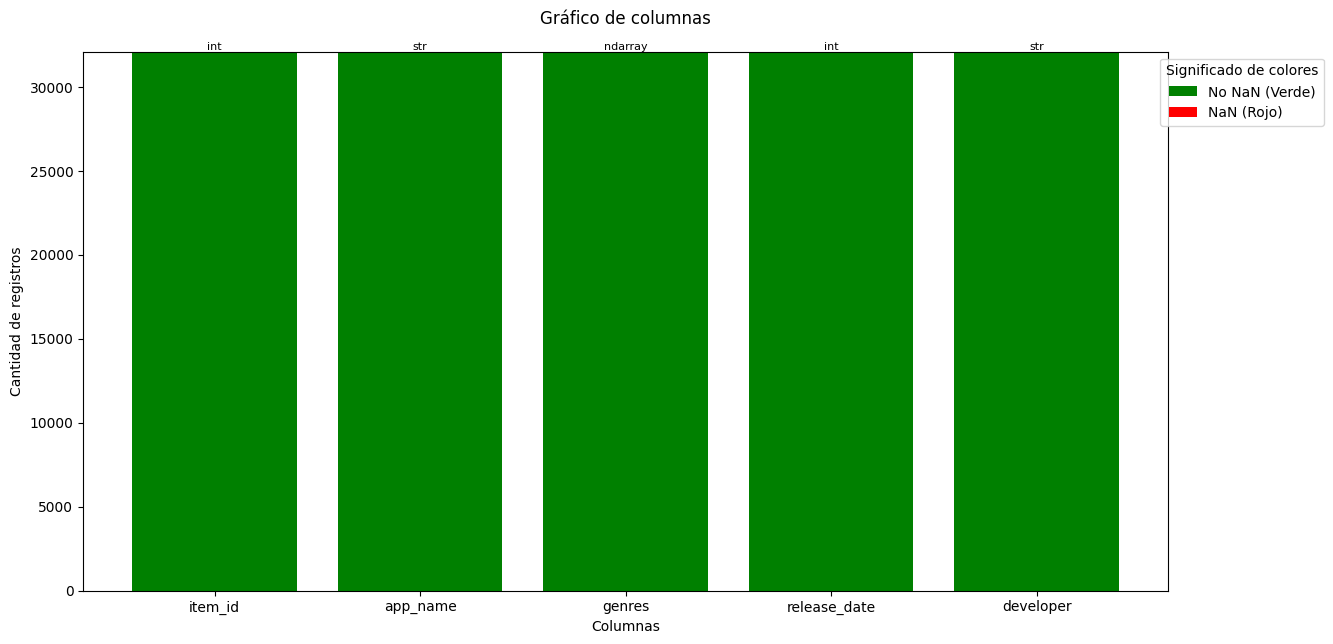

In [95]:
funciones.plot_df_info(steam_games_df)

# Detección de outliers

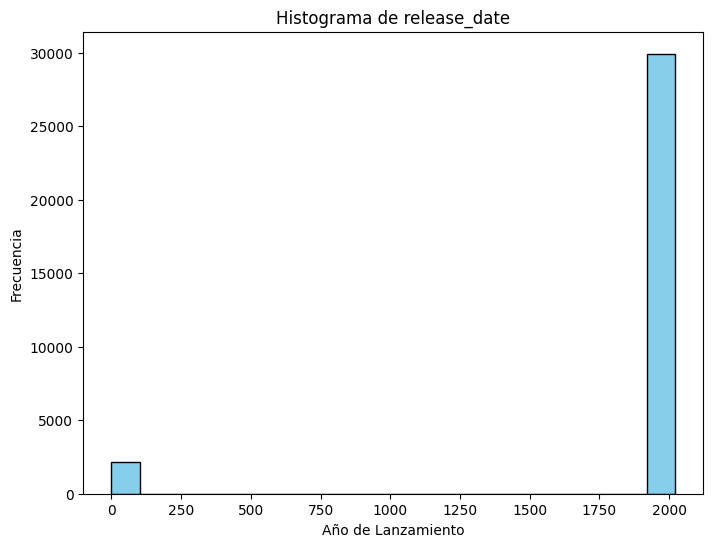

In [96]:
plt.figure(figsize=(8,6))
plt.hist(steam_games_df['release_date'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de release_date')
plt.show()

In [101]:
# Cálculo de z-score e IQR
z_scores = zscore(steam_games_df['release_date'])
outliers = steam_games_df[abs(z_scores) > 3]
outliers = outliers[outliers['release_date'] != 0] # filtramos 0 porque son datos nulos
outliers # vemos la sensibilidad a valores extremos

,item_id,app_name,genres,release_date,developer


In [102]:
# Cálculo de IQR
Q1 = steam_games_df['release_date'].quantile(0.25)
Q3 = steam_games_df['release_date'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = steam_games_df[(steam_games_df['release_date'] < lower_limit) | (steam_games_df['release_date'] > upper_limit)]
outliers = outliers[outliers['release_date'] != 0] # filtramos 0 porque son datos nulos
outliers

,item_id,app_name,genres,release_date,developer
27,282010,Carmageddon Max Pack,"[1990's, Action, Classic, Gore, Indie, Multipl...",1997,Stainless Games Ltd
28,70,Half-Life,"[1990's, Action, Adventure, Aliens, Atmospheri...",1998,Valve
39,1640,Disciples II: Gallean's Return,"[Atmospheric, Classic, Dark Fantasy, Fantasy, ...",2006,Strategy First
40,1630,Disciples II: Rise of the Elves,"[Atmospheric, Classic, Dark Fantasy, Fantasy, ...",2006,Strategy First
41,2400,The Ship: Murder Party,"[Action, Adventure, Assassin, Comedy, Difficul...",2006,Outerlight Ltd.
...,...,...,...,...,...
32083,259340,Chicken Shoot Gold,"[Action, Casual, Indie, Shooter]",2003,ToonTRAXX Studios
32084,30,Day of Defeat,"[Action, Class-Based, Classic, Co-op, FPS, Fir...",2003,Valve
32085,200980,Geneforge 2,"[Indie, Isometric, RPG, Strategy, Turn-Based, ...",2003,Spiderweb Software
32086,13230,Unreal Tournament 2004: Editor's Choice Edition,"[Action, Adventure, Arena Shooter, Atmospheric...",2004,"Epic Games, Inc."
